In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
#Feature and Target Selection
x = df.drop(columns = ['Email No.','Prediction'], errors = 'ignore')
y = df['Prediction']

In [11]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [13]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#K-Nearset Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

print("======= KNN MODEL EVALUATION =======")
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, y_knn_pred, zero_division=0))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_knn_pred))

======= KNN MODEL EVALUATION =======
KNN Accuracy: 0.8344934261407579

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       913
           1       0.65      0.96      0.77       380

    accuracy                           0.83      1293
   macro avg       0.81      0.87      0.82      1293
weighted avg       0.88      0.83      0.84      1293

KNN Confusion Matrix:
 [[716 197]
 [ 17 363]]


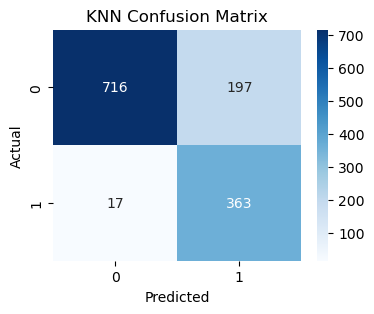

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrix for KNN
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
# -------- Support Vector Machine --------
svm = SVC(kernel = 'linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("======= SVM MODEL EVALUATION =======")
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

======= SVM MODEL EVALUATION =======
SVM Accuracy: 0.9481825212683681

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       913
           1       0.89      0.93      0.91       380

    accuracy                           0.95      1293
   macro avg       0.93      0.94      0.94      1293
weighted avg       0.95      0.95      0.95      1293

SVM Confusion Matrix:
 [[871  42]
 [ 25 355]]


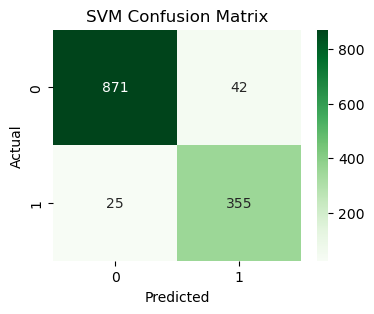

In [33]:
#confusion matrix for svm
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()